<a href="https://colab.research.google.com/github/corncode8/Forecast-Electric-power-/blob/main/%EC%A0%84%EB%A0%A5%EB%9F%89_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import random
import os

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

from tqdm.auto import tqdm

In [ ]:
# 나눔고딕 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# matplotlib의 폰트를 나눔고딕으로 설정
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,053 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121658 files and dire

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DATA_PATH = "/content/drive/MyDrive/AI/dataset/"

In [ ]:
os.chdir(DATA_PATH)

In [ ]:
data = pd.read_csv('./data.csv', encoding='CP949')
data

,거래일,1시,2시,3시,4시,5시,6시,7시,8시,9시,...,15시,16시,17시,18시,19시,20시,21시,22시,23시,24시
0,2017-01-01,55122.00025,52867.08431,51112.85964,50228.43714,50270.22378,50799.94295,50977.49163,50159.77005,49592.16798,...,49326.41341,49371.40992,49589.38287,51882.15402,53668.27648,53537.42430,53490.78492,53574.56477,54804.75240,55415.26297
1,2017-01-02,53229.02548,52920.74405,52521.67207,52558.05400,53271.30338,54905.05820,56645.02366,58570.71254,64429.09414,...,65638.65262,65560.15769,66293.47450,66666.54602,65854.39132,64004.04846,62153.75753,60619.74204,60606.06141,61807.70918
2,2017-01-03,58347.54895,57012.44028,56541.88017,56513.31631,57373.69797,58908.70117,61596.09922,64252.66753,68662.06271,...,66752.04802,66488.28873,67703.83451,68683.59288,68571.18682,66663.57764,64526.28462,62889.17741,62559.95542,63718.92409
3,2017-01-04,60016.32336,58366.48843,58643.34614,58715.11106,58916.98777,59710.07343,61895.51298,64259.83376,69180.34447,...,67257.05729,66809.35692,67653.22112,68143.51424,67470.51174,65571.37045,63998.52134,62667.07412,62512.13690,63744.05670
4,2017-01-05,59751.77799,57865.01145,58001.78231,57893.72453,58456.74216,59722.97433,62058.10242,64262.80299,69080.14776,...,69860.23713,69280.43397,69700.31720,69391.24809,68039.52590,65975.46819,63804.64394,62122.48427,61813.14500,63178.04751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,2021-12-27,63564.18231,62107.17746,61799.12008,61742.69350,62506.04618,64536.83135,68255.58503,74329.13146,82318.89479,...,84864.21032,85832.87409,86701.93015,84918.71880,81301.65189,77785.71290,74509.31867,71146.23326,69549.30371,70745.03013
1822,2021-12-28,67704.59620,66012.53027,65976.49241,65955.38218,66144.75240,67247.03894,70555.91387,75984.83821,83007.36217,...,83109.94818,83420.55790,83944.56266,82260.93594,79216.44691,76207.56352,73242.31092,70153.92775,68510.70700,69557.98801
1823,2021-12-29,66438.60905,64517.56031,64356.35818,64171.94178,64848.46349,66546.61575,69520.26483,73882.96959,80219.62191,...,79048.27263,78850.74482,79844.30275,78760.45301,76494.09188,74179.75391,71979.32120,68915.72558,67475.31204,68543.67435
1824,2021-12-30,65449.13938,64094.12131,63919.46422,63797.46009,64271.64832,65853.11227,68675.64582,72943.27122,79703.07593,...,78343.35029,79060.72703,80411.84327,79390.33859,77141.44595,74683.53072,72400.84958,69695.31403,68244.68573,69161.21971


In [ ]:
# '거래일' 열을 datetime 형식으로 변환
data['거래일'] = pd.to_datetime(data['거래일'])

# 요일 추출 (월요일: 0, 일요일: 6)
data['요일'] = data['거래일'].dt.dayofweek  # 월요일부터 일요일까지를 0에서 6까지로 변환

# 시간대별 데이터를 긴 형식으로 재구성 (melt)
data_melted = data.melt(id_vars=['거래일', '요일'],
                        var_name='시간',
                        value_name='발전량')

# '시간' 열의 시간을 정수로 변환 (예: '1시' -> 1)
data_melted['시간'] = data_melted['시간'].str.replace('시', '').astype(int)

# 결과 확인
data_melted

,거래일,요일,시간,발전량
0,2017-01-01,6,1,55122.00025
1,2017-01-02,0,1,53229.02548
2,2017-01-03,1,1,58347.54895
3,2017-01-04,2,1,60016.32336
4,2017-01-05,3,1,59751.77799
...,...,...,...,...
43819,2021-12-27,0,24,70745.03013
43820,2021-12-28,1,24,69557.98801
43821,2021-12-29,2,24,68543.67435
43822,2021-12-30,3,24,69161.21971


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-pac

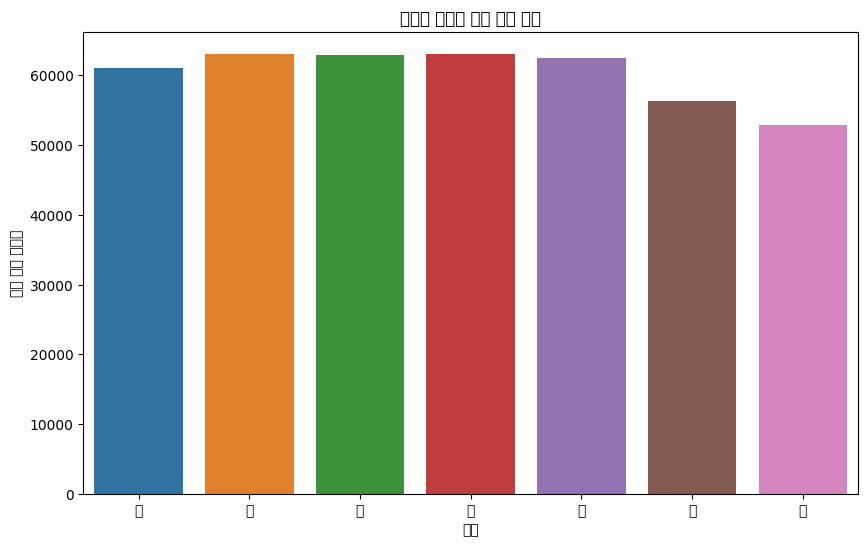

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'NanumBarunGothic' # 나눔바른고딕 적용하기

# 요일별 평균 전력 수요 계산
weekly_demand = data_melted.groupby('요일')['발전량'].mean()

# 요일 이름 설정
days = ['월', '화', '수', '목', '금', '토', '일']

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=days, y=weekly_demand)
plt.title('일주일 동안의 평균 전력 수요')
plt.xlabel('요일')
plt.ylabel('평균 전력 수요량')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt

# 이미 전처리된 데이터에서 필요한 feature engineering을 수행합니다.
# 여기서는 간단히 예시를 드는 것으로, 실제 데이터에 맞게 조정해야 합니다.
data_melted['발전량_7일_전'] = data_melted.groupby(['시간', '요일'])['발전량'].shift(7)
data_melted['발전량_3일_전'] = data_melted.groupby(['시간', '요일'])['발전량'].shift(3)
data_melted['발전량_1일_전'] = data_melted.groupby(['시간', '요일'])['발전량'].shift(1)

# 결측값을 제거합니다.
data_melted.dropna(inplace=True)
data_melted

,거래일,요일,시간,발전량,발전량_7일_전,발전량_3일_전,발전량_1일_전
49,2017-02-19,6,1,57479.14569,55122.00025,49566.69262,59952.75091
50,2017-02-20,0,1,53802.35392,53229.02548,51106.23134,57678.89595
51,2017-02-21,1,1,61259.77070,58347.54895,55489.35379,61833.90772
52,2017-02-22,2,1,59848.02574,60016.32336,61912.84867,62115.68940
53,2017-02-23,3,1,59978.10266,59751.77799,63634.04024,61333.96311
...,...,...,...,...,...,...,...
43819,2021-12-27,0,24,70745.03013,60467.11212,65064.76103,66125.59762
43820,2021-12-28,1,24,69557.98801,61655.57306,65508.61758,66591.21987
43821,2021-12-29,2,24,68543.67435,62029.77724,65720.89570,66981.09450
43822,2021-12-30,3,24,69161.21971,62749.06800,65475.96570,67325.95625


In [ ]:
# 학습 데이터와 테스트 데이터로 분할
train_data = data_melted[(data_melted['거래일'] >= '2017-01-01') & (data_melted['거래일'] <= '2020-12-31')]
test_data = data_melted[(data_melted['거래일'] >= '2021-01-01') & (data_melted['거래일'] <= '2021-12-31')]

# 학습 데이터와 테스트 데이터의 크기 확인
train_data_size = train_data.shape[0]
test_data_size = test_data.shape[0]

train_data_size, test_data_size

(33888, 8760)

In [ ]:
# 특징과 타겟 변수를 정의합니다.
X_train = train_data[['시간', '요일', '발전량_7일_전', '발전량_3일_전', '발전량_1일_전']]
y_train = train_data['발전량']
X_test = test_data[['시간', '요일', '발전량_7일_전', '발전량_3일_전', '발전량_1일_전']]
y_test = test_data['발전량']

In [ ]:
#1번모델
# XGBoost 모델을 초기화하고 학습합니다.
model = XGBRegressor(max_depth=8, subsample=0.8, min_child_weight=1, gamma=0.01)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.01, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# 예측을 수행합니다.
predictions = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# 성능을 MAPE, MSE, R2로 평가합니다.
mape = mean_absolute_percentage_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'MAPE: {mape}')
print(f'MSE: {mse}')
print(f'R2 SCORE: {r2}')

MAPE: 0.04848595617385966
MSE: 20682323.32144821
R2 SCORE: 0.712554853019272


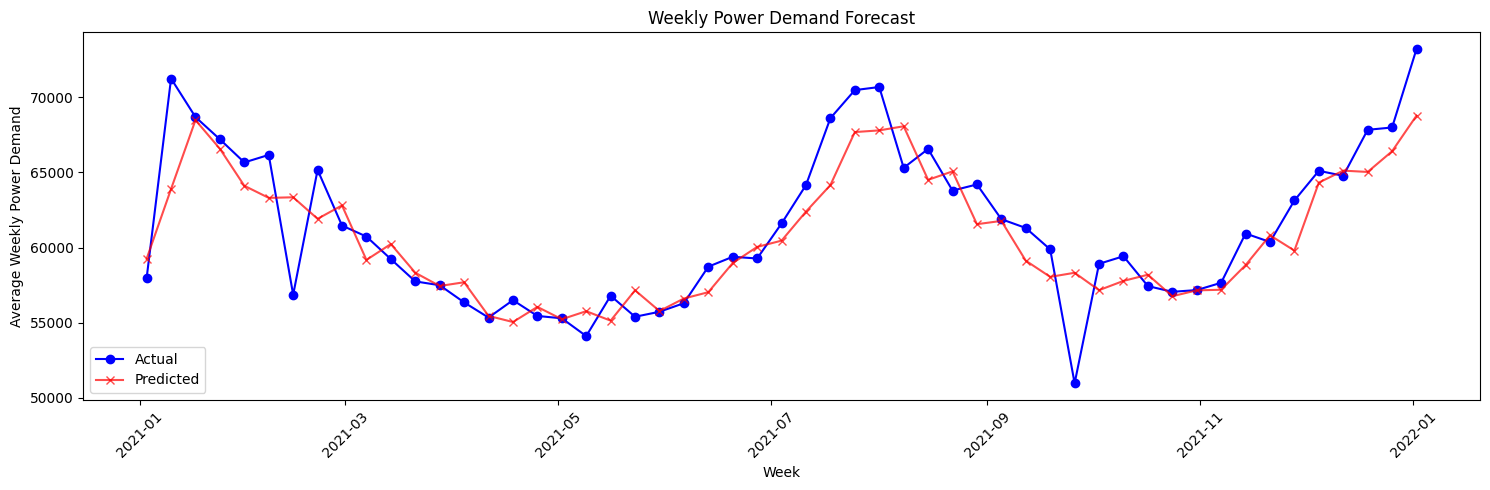

In [ ]:
# 날짜 열을 DatetimeIndex로 설정합니다.
y_test.index = pd.to_datetime(test_data['거래일'])

# 'y_test'와 'predictions'의 인덱스를 맞춥니다.
predictions_indexed = pd.Series(predictions, index=y_test.index)

# 주 단위로 데이터를 집계합니다.
y_test_aggregated = y_test.resample('W').mean()
predictions_aggregated = predictions_indexed.resample('W').mean()

# 시각화를 개선합니다.
plt.figure(figsize=(15, 5))
plt.plot(y_test_aggregated.index, y_test_aggregated, label='Actual', color='blue', marker='o')
plt.plot(predictions_aggregated.index, predictions_aggregated, label='Predicted', color='red', alpha=0.7, marker='x')
plt.title('Weekly Power Demand Forecast')
plt.xlabel('Week')
plt.ylabel('Average Weekly Power Demand')
plt.xticks(rotation=45)  # 날짜 라벨을 회전하여 가독성 향상
plt.tight_layout()  # 레이아웃을 타이트하게 조정하여 축 주변에 공간을 줄입니다.
plt.legend()
plt.show()

In [ ]:
#2번모델
# XGBoost 모델을 초기화하고 학습합니다.
model = XGBRegressor(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.8, colsample_bytree=1, gamma=0.01)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.01, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
# 예측을 수행합니다.
predictions = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# 성능을 MAPE, MSE, R2로 평가합니다.
mape = mean_absolute_percentage_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'MAPE: {mape}')
print(f'MSE: {mse}')
print(f'R2 SCORE: {r2}')

MAPE: 0.04568966301914659
MSE: 18598710.90249442
R2 SCORE: 0.7415131218127948


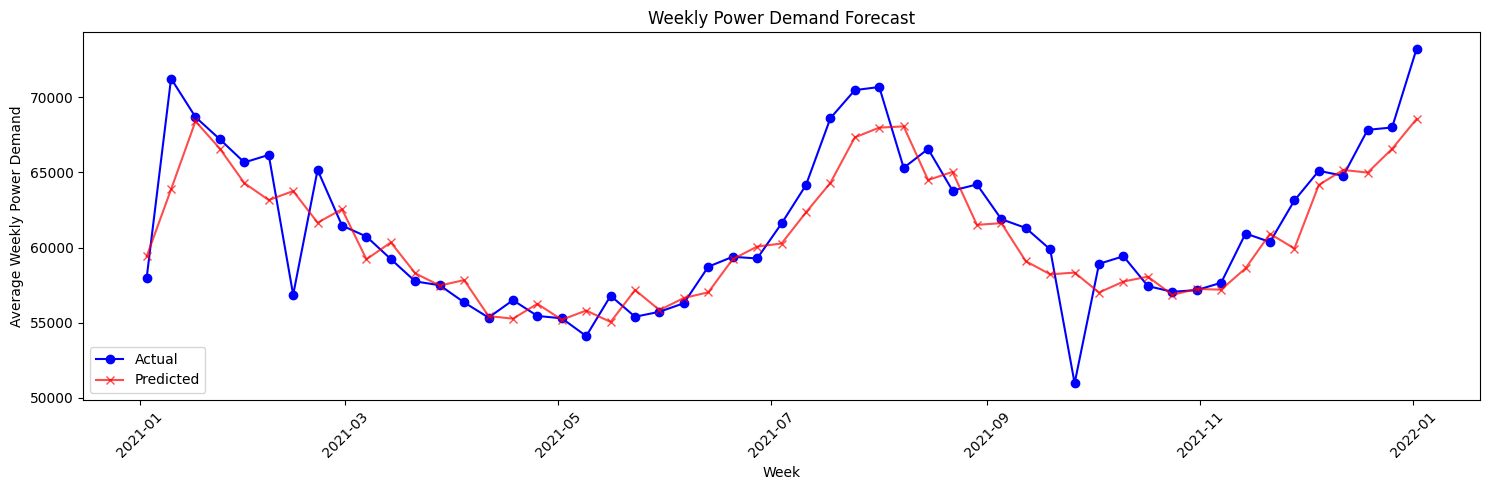

In [ ]:
# 날짜 열을 DatetimeIndex로 설정합니다.
y_test.index = pd.to_datetime(test_data['거래일'])

# 'y_test'와 'predictions'의 인덱스를 맞춥니다.
predictions_indexed = pd.Series(predictions, index=y_test.index)

# 주 단위로 데이터를 집계합니다.
y_test_aggregated = y_test.resample('W').mean()
predictions_aggregated = predictions_indexed.resample('W').mean()

# 시각화를 개선합니다.
plt.figure(figsize=(15, 5))
plt.plot(y_test_aggregated.index, y_test_aggregated, label='Actual', color='blue', marker='o')
plt.plot(predictions_aggregated.index, predictions_aggregated, label='Predicted', color='red', alpha=0.7, marker='x')
plt.title('Weekly Power Demand Forecast')
plt.xlabel('Week')
plt.ylabel('Average Weekly Power Demand')
plt.xticks(rotation=45)  # 날짜 라벨을 회전하여 가독성 향상
plt.tight_layout()  # 레이아웃을 타이트하게 조정하여 축 주변에 공간을 줄입니다.
plt.legend()
plt.show()

In [ ]:
#3번모델
# XGBoost 모델을 초기화하고 학습합니다.
model = XGBRegressor(n_estimators=4682, max_depth=8, learning_rate=0.08979034933474227, subsample=0.8905280196300354, colsample_bytree=0.9523645407001878, gamma=0.01)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9523645407001878, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.01, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.08979034933474227, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=4682, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# 예측을 수행합니다.
predictions = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# 성능을 MAPE, MSE, R2로 평가합니다.
mape = mean_absolute_percentage_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'MAPE: {mape}')
print(f'MSE: {mse}')
print(f'R2 SCORE: {r2}')

MAPE: 0.0500674607035496
MSE: 21042405.94098345
R2 SCORE: 0.7075503861666445


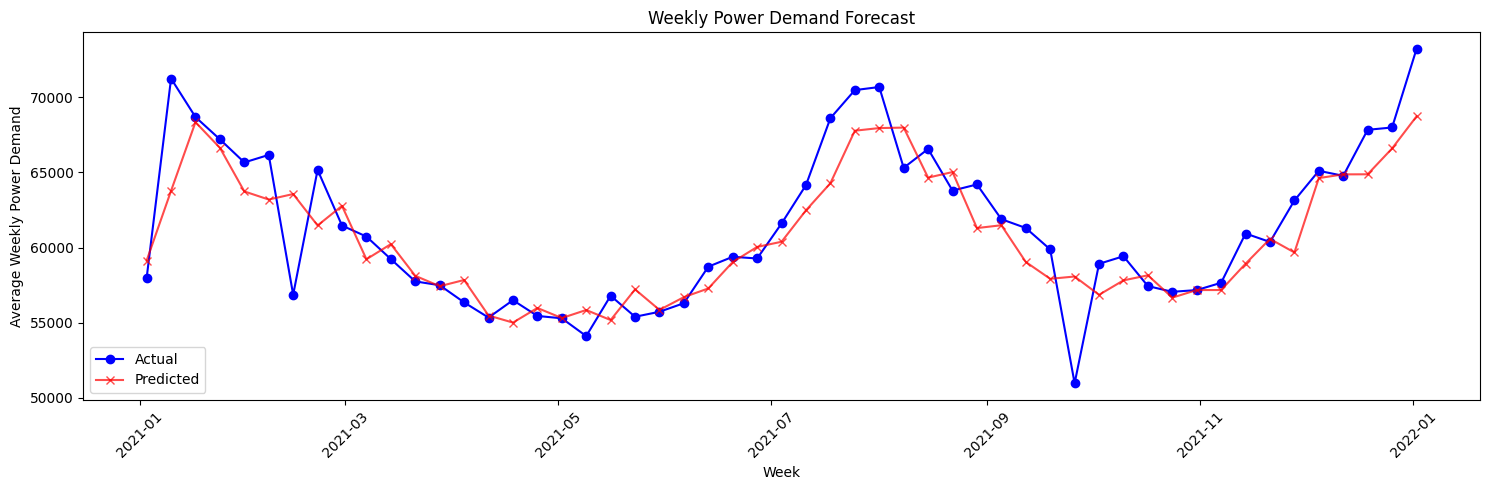

In [ ]:
# 날짜 열을 DatetimeIndex로 설정합니다.
y_test.index = pd.to_datetime(test_data['거래일'])

# 'y_test'와 'predictions'의 인덱스를 맞춥니다.
predictions_indexed = pd.Series(predictions, index=y_test.index)

# 주 단위로 데이터를 집계합니다.
y_test_aggregated = y_test.resample('W').mean()
predictions_aggregated = predictions_indexed.resample('W').mean()

# 시각화를 개선합니다.
plt.figure(figsize=(15, 5))
plt.plot(y_test_aggregated.index, y_test_aggregated, label='Actual', color='blue', marker='o')
plt.plot(predictions_aggregated.index, predictions_aggregated, label='Predicted', color='red', alpha=0.7, marker='x')
plt.title('Weekly Power Demand Forecast')
plt.xlabel('Week')
plt.ylabel('Average Weekly Power Demand')
plt.xticks(rotation=45)  # 날짜 라벨을 회전하여 가독성 향상
plt.tight_layout()  # 레이아웃을 타이트하게 조정하여 축 주변에 공간을 줄입니다.
plt.legend()
plt.show()

In [ ]:
#4번모델
# XGBoost 모델을 초기화하고 학습합니다.
model = XGBRegressor(n_estimators=5000, max_depth=8, learning_rate=0.05, subsample=0.7, colsample_bytree=0.5, gamma=0.01)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.01, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=5000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# 예측을 수행합니다.
predictions = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# 성능을 MAPE, MSE, R2로 평가합니다.
mape = mean_absolute_percentage_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'MAPE: {mape}')
print(f'MSE: {mse}')
print(f'R2 SCORE: {r2}')

MAPE: 0.05321213237242227
MSE: 23769357.05472402
R2 SCORE: 0.6696509272172941


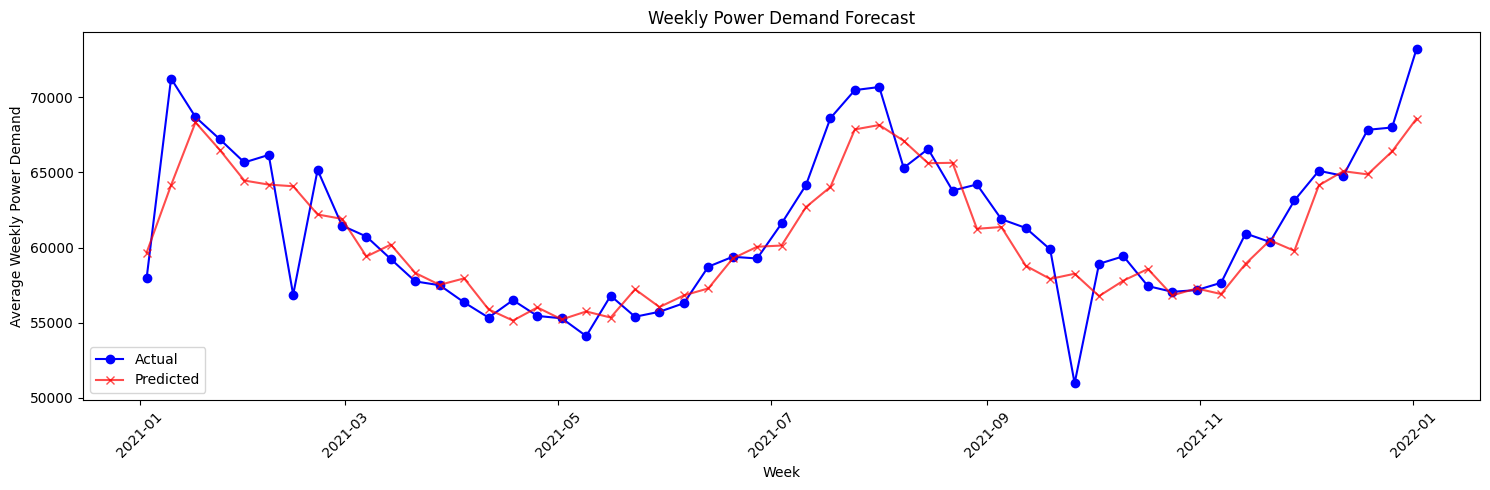

In [ ]:
# 날짜 열을 DatetimeIndex로 설정합니다.
y_test.index = pd.to_datetime(test_data['거래일'])

# 'y_test'와 'predictions'의 인덱스를 맞춥니다.
predictions_indexed = pd.Series(predictions, index=y_test.index)

# 주 단위로 데이터를 집계합니다.
y_test_aggregated = y_test.resample('W').mean()
predictions_aggregated = predictions_indexed.resample('W').mean()

# 시각화를 개선합니다.
plt.figure(figsize=(15, 5))
plt.plot(y_test_aggregated.index, y_test_aggregated, label='Actual', color='blue', marker='o')
plt.plot(predictions_aggregated.index, predictions_aggregated, label='Predicted', color='red', alpha=0.7, marker='x')
plt.title('Weekly Power Demand Forecast')
plt.xlabel('Week')
plt.ylabel('Average Weekly Power Demand')
plt.xticks(rotation=45)  # 날짜 라벨을 회전하여 가독성 향상
plt.tight_layout()  # 레이아웃을 타이트하게 조정하여 축 주변에 공간을 줄입니다.
plt.legend()
plt.show()

In [ ]:
#5번모델
# XGBoost 모델을 초기화하고 학습합니다.
model = XGBRegressor(n_estimators=100, max_depth=4, learning_rate=0.05, subsample=0.5, colsample_bytree=1, gamma=0.01, min_child_weight=10, eta=0.05)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eta=0.05, eval_metric=None, feature_types=None, gamma=0.01,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=10, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

In [ ]:
# 예측을 수행합니다.
predictions = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 성능을 MAE, MAPE, MSE, R2로 평가합니다.
mae = mean_absolute_error(y_test, predictions)
mape = mean_absolute_percentage_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'MAE: {mae}')
print(f'MAPE: {mape}')
print(f'MSE: {mse}')
print(f'R2 SCORE: {r2}')

MAE: 2603.7716965851882
MAPE: 0.04242652856679531
MSE: 15883138.556604467
R2 SCORE: 0.7792544374265805


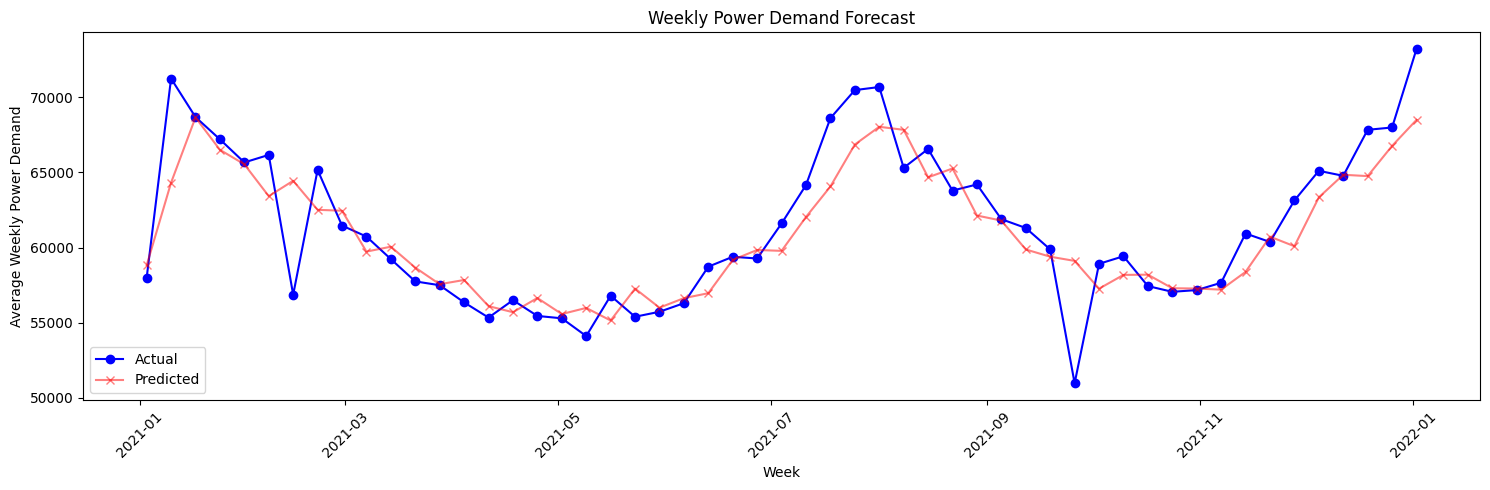

In [ ]:
# 날짜 열을 DatetimeIndex로 설정합니다.
y_test.index = pd.to_datetime(test_data['거래일'])

# 'y_test'와 'predictions'의 인덱스를 맞춥니다.
predictions_indexed = pd.Series(predictions, index=y_test.index)

# 주 단위로 데이터를 집계합니다.
y_test_aggregated = y_test.resample('W').mean()
predictions_aggregated = predictions_indexed.resample('W').mean()

# 시각화를 개선합니다.
plt.figure(figsize=(15, 5))
plt.plot(y_test_aggregated.index, y_test_aggregated, label='Actual', color='blue', marker='o')
plt.plot(predictions_aggregated.index, predictions_aggregated, label='Predicted', color='red', alpha=0.5, marker='x')
plt.title('Weekly Power Demand Forecast')
plt.xlabel('Week')
plt.ylabel('Average Weekly Power Demand')
plt.xticks(rotation=45)  # 날짜 라벨을 회전하여 가독성 향상
plt.tight_layout()  # 레이아웃을 타이트하게 조정하여 축 주변에 공간을 줄입니다.
plt.legend()
plt.show()

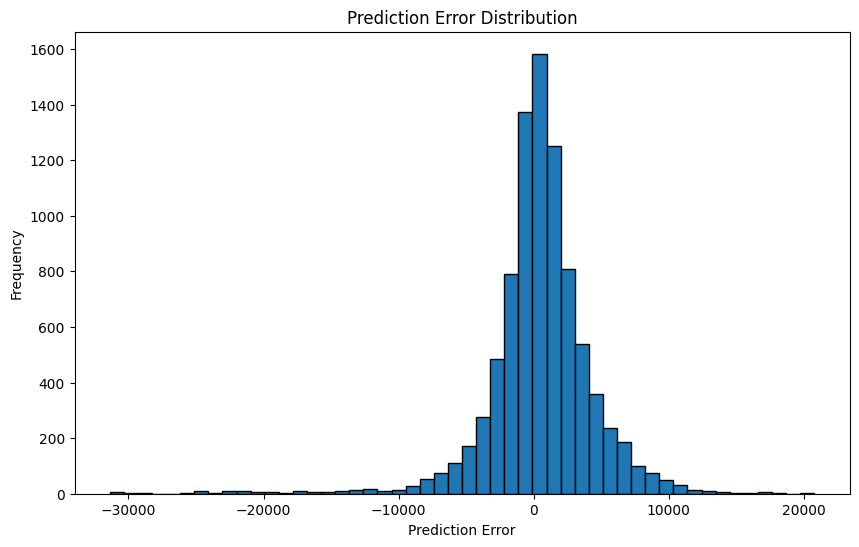

In [ ]:
# 오차 계산
errors = y_test - predictions

# 오차 히스토그램 시각화
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=50, edgecolor='black')
plt.title('Prediction Error Distribution')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.show()

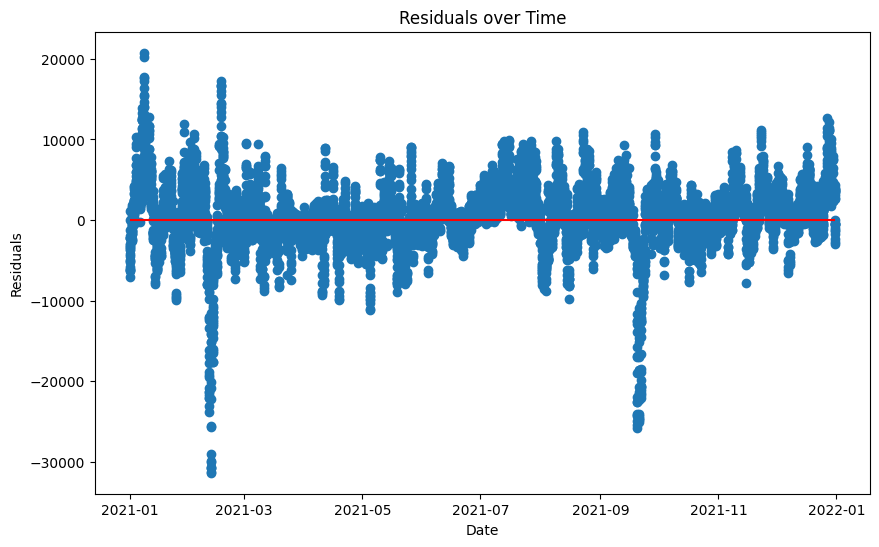

In [ ]:
# 잔차 계산
residuals = y_test - predictions

# 잔차 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test.index, residuals)
plt.hlines(y=0, xmin=y_test.index.min(), xmax=y_test.index.max(), colors='r')
plt.title('Residuals over Time')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()

In [ ]:
#6번모델
# XGBoost 모델을 초기화하고 학습합니다.
model = XGBRegressor(n_estimators=5000, max_depth=4, learning_rate=0.05, subsample=0.5, colsample_bytree=1, gamma=0.01, min_child_weight=10, eta=0.05, eval_metric='mae', colsample_bylevel=0.7, alpha=0.1)
model.fit(X_train, y_train)

XGBRegressor(alpha=0.1, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=0.7, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eta=0.05, eval_metric='mae', feature_types=None, gamma=0.01,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=10, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=5000, n_jobs=None, ...)

In [ ]:
# 예측을 수행합니다.
predictions = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# 성능을 MAPE, MSE, R2로 평가합니다.
mape = mean_absolute_percentage_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'MAPE: {mape}')
print(f'MSE: {mse}')
print(f'R2 SCORE: {r2}')

MAPE: 0.046580594465610164
MSE: 19525761.794169493
R2 SCORE: 0.7286288691263564


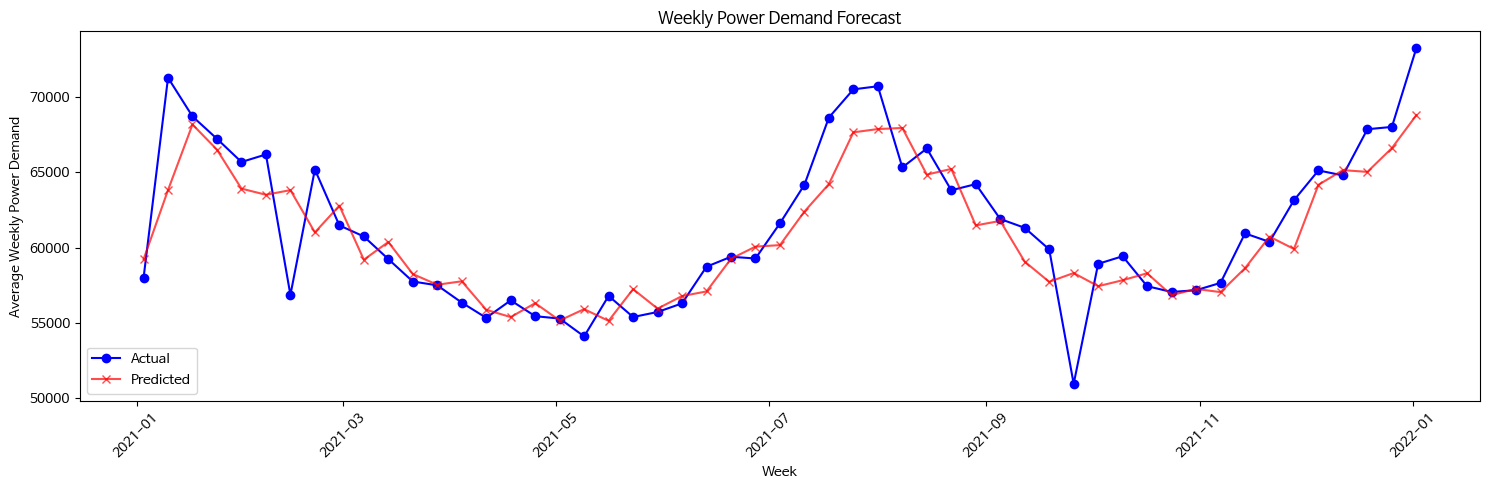

In [ ]:
# 날짜 열을 DatetimeIndex로 설정합니다.
y_test.index = pd.to_datetime(test_data['거래일'])

# 'y_test'와 'predictions'의 인덱스를 맞춥니다.
predictions_indexed = pd.Series(predictions, index=y_test.index)

# 주 단위로 데이터를 집계합니다.
y_test_aggregated = y_test.resample('W').mean()
predictions_aggregated = predictions_indexed.resample('W').mean()

# 시각화를 개선합니다.
plt.figure(figsize=(15, 5))
plt.plot(y_test_aggregated.index, y_test_aggregated, label='Actual', color='blue', marker='o')
plt.plot(predictions_aggregated.index, predictions_aggregated, label='Predicted', color='red', alpha=0.7, marker='x')
plt.title('Weekly Power Demand Forecast')
plt.xlabel('Week')
plt.ylabel('Average Weekly Power Demand')
plt.xticks(rotation=45)  # 날짜 라벨을 회전하여 가독성 향상
plt.tight_layout()  # 레이아웃을 타이트하게 조정하여 축 주변에 공간을 줄입니다.
plt.legend()
plt.show()